In [14]:
# !pip install pynter-defects

In [15]:
from pynter.defects.analysis import DefectsAnalysis
from pynter.tools.utils import get_content_from_url

# Brouwer Diagrams

Once we have created our dataset of defects (`DefectsAnalysis`), we can compute the defect concentrations as a function of the oxygen partial pressure. 

In [16]:
data_url = 'https://raw.githubusercontent.com/lorenzo-villa-hub/pynter-tutorials/master/notebooks/defects/data/'

Import the `DefectAnalysis` object from the `json` file

In [17]:
#da = DefectsAnalysis.from_json('./data/defects_analysis.json')
da = DefectsAnalysis.from_json(get_content_from_url(data_url+'defects_analysis.json'))

Import the `Reservoirs` object containing the chemical potentials 

In [18]:
from pynter.phase_diagram.chempots import Reservoirs

#res = Reservoirs.from_json('./data/reservoirs_extrinsic.json')
res = Reservoirs.from_json(get_content_from_url(data_url+'reservoirs.json'))

In [19]:
from pymatgen.electronic_structure.dos import FermiDos
from pynter.tools.utils import get_object_from_json

# import DOS
#dos = get_object_from_json(FermiDos,'./data/dos.json')
dos = get_object_from_json(FermiDos, get_content_from_url(data_url+'dos.json'))

In [20]:
res.get_dataframe(ndecimals=2)

,Na,Nb,O
A,-2.78,-11.10,-8.85
B,-2.32,-11.22,-8.96
C,-4.32,-21.26,-4.95
D,-4.73,-20.85,-4.95
X,-3.57,-16.25,-6.87


# Filter entries

Choose which defects to analyse. The `DefectsAnalysis` class contains methods to organize and filter the defect entries based on different criteria. In this case (for simplicity) we choose to analyse only the vacancies.

In [21]:
da_vac = da.filter_entries(exclude=True,mode='or',types=['DefectComplex'],elements=['Ca','Sr','Sn'])
da_vac.get_dataframe()

,symbol,delta atoms,charge,multiplicity
name,,,,
Vac_Na,$V_{Na}$,{'Na': -1},-1.0,32
Vac_Na,$V_{Na}$,{'Na': -1},0.0,32
Vac_Na,$V_{Na}$,{'Na': -1},1.0,32
Vac_Nb,$V_{Nb}$,{'Nb': -1},-5.0,32
Vac_Nb,$V_{Nb}$,{'Nb': -1},-4.0,32
Vac_Nb,$V_{Nb}$,{'Nb': -1},-3.0,32
Vac_Nb,$V_{Nb}$,{'Nb': -1},-2.0,32
Vac_Nb,$V_{Nb}$,{'Nb': -1},-1.0,32
Vac_Nb,$V_{Nb}$,{'Nb': -1},0.0,32


### Oxygen partial pressure and chemical potentials

First we need to connect the oxygen partial pressure to the chemical potentials. The `OxygenPressure` class contains methods to compute the chemical potential of oxygen starting from the partial pressure using the ideal gas law. <br></br>

We need to define a `Reservoirs` object with partial pressure values as keys. The `get_pressure_reservoirs_from_pd` method is the most direct way to achieve it. Taking the `PhaseDiagram` and `Composition` as input, it computes the chemical potential of oxygen, and computes the other chemical potentials in the target phase. The range of partial pressures is provided as argument. If the phase diagram is 3-component, once $\mu_O$ is fixed, the value of the remaining two chempots is taken from the middle of the stability region in the target phase. Currently, this is implemented for up to 3 components. Reservoirs for 4 component diagrams need to be defined manually.

In [22]:
from pynter.phase_diagram.thermodynamics import OxygenPressure
from pynter.defects.thermodynamics import DefectThermodynamics
from pymatgen.core.composition import Composition

In [23]:
pressure_reservoirs = OxygenPressure().get_pressure_reservoirs_from_pd(phase_diagram=res.pd,target_comp=Composition('NaNbO3'),
                                                                       temperature=1000,npoints=50)

In [24]:
pressure_reservoirs.get_dataframe(ndecimals=2)

,Na,Nb,O
1.000000e-20,-2.99,-13.38,-8.01
4.095000e-20,-3.02,-13.54,-7.95
1.677000e-19,-3.06,-13.69,-7.89
6.866000e-19,-3.09,-13.84,-7.83
2.812000e-18,-3.12,-13.99,-7.77
1.151000e-17,-3.15,-14.14,-7.71
4.715000e-17,-3.18,-14.30,-7.65
1.931000e-16,-3.21,-14.45,-7.59
7.906000e-16,-3.24,-14.60,-7.53
3.237000e-15,-3.27,-14.75,-7.47


## Compute concentrations

For each set of chemical potentials, we solve the charge neutrality condition to compute the Fermi level and the defect concentrations. This is done with the `DefectThermodynamics` class. The density of states pymatgen object (`Dos`, `FermiDos` or `CompleteDos`) is needed to compute carrier concentrations and solve charge neutrality.

In [25]:
pa = DefectThermodynamics(defects_analysis=da_vac,bulk_dos=dos)

### `ThermoData`

The generated thermodynamic data is handled by the `ThermoData` class (can also be addressed as a dictionary). These quatities are saved as attributes:
- `partial_pressures` (list) : List of partial pressures.
- `defect_concentrations` (list) : List of `DefectConcentrations` objects containg defect concentrations data for every partial pressure.
- `carrier_concentrations` (list) : List of tuples with intrinsic carriers concentrations (holes,electrons). 
- `conductivities` (list) : List of conductivity values (in S/m) (if they have been computed).
- `fermi_levels` (list) : list of Fermi level values.

The object can be stored as `json` to be quickly recalled without having to compute it again.

In [26]:
thermodata = pa.get_pO2_thermodata(reservoirs=pressure_reservoirs,temperature=1000)

## Plot Brower diagrams

The `ThermoData` object can be plotted using the `ThermodynamicsPlotter` class. The concentrations can be plotted in different ways by changing the `output` argoment in the `plot_pO2_vs_concentrations` method:
- `"total"` (default): For each defect species, the concentration of all charge states are summed.
- `"all"`: Every charge state of every defect species is plotted separately.
- `"stable"`: Plot concentration of the most stable charge state for each defect species. The modified stable charge state is indicated by text at the corresponding partial pressure value.

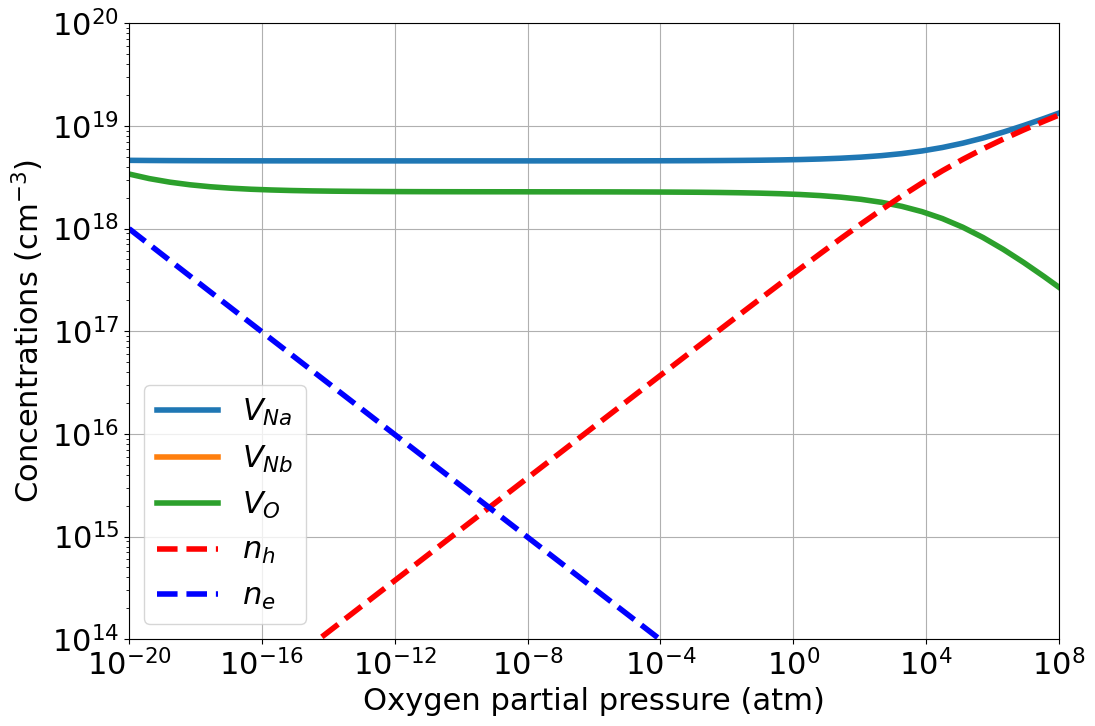

In [27]:
from pynter.defects.plotter import ThermodynamicsPlotter

plotter = ThermodynamicsPlotter()
plotter.plot_pO2_vs_concentrations(thermodata=thermodata,ylim=(1e14,1e20));

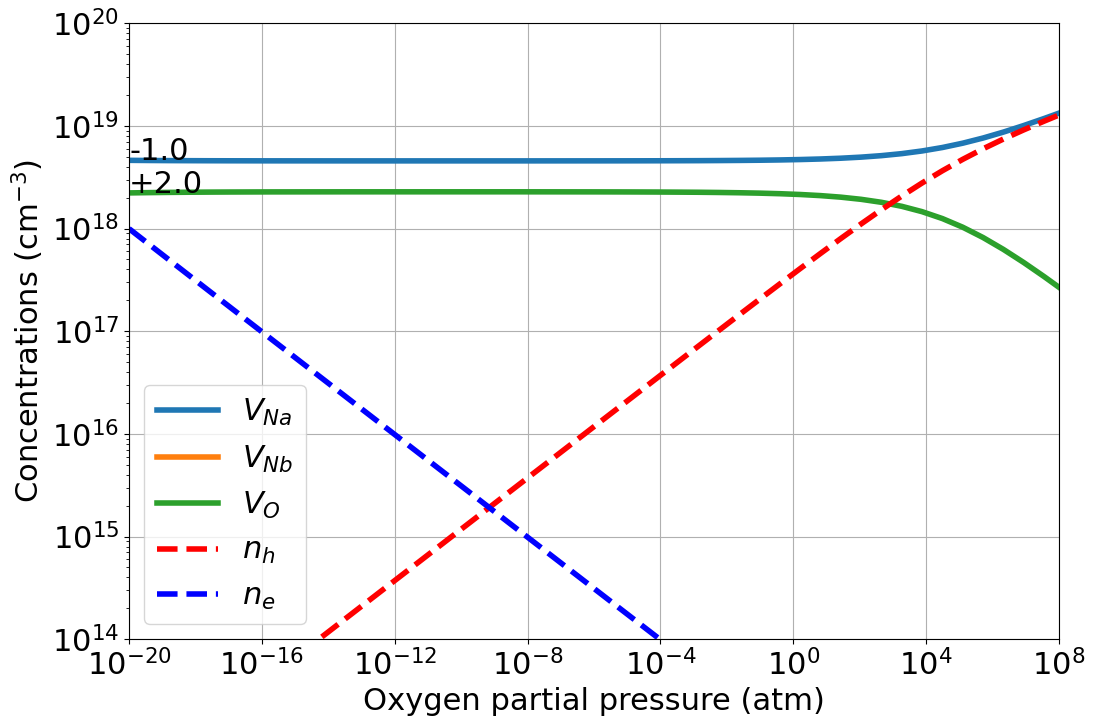

In [28]:
plotter.plot_pO2_vs_concentrations(thermodata,'stable',ylim=(1e14,1e20));

Defect species to plot can be filtered. Provide `**kwargs` in the `plot_pO2_vs_concentrations` method to pass arguments to the `filter_concentrations` method in the `DefectConcentrations` class.

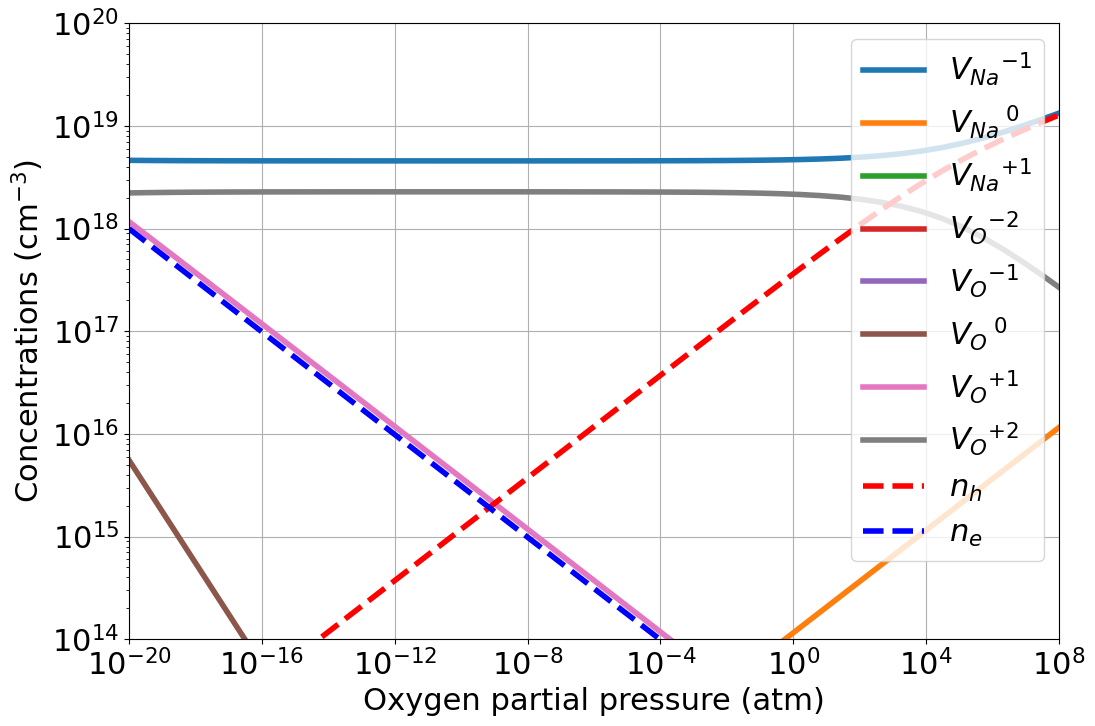

In [29]:
# filter defects to plot
plotter.plot_pO2_vs_concentrations(thermodata,ylim=(1e14,1e20),output='all',exclude=True,names=['Vac_Nb']);

# Quenched defects

Defect equilibrium can be computed also in quenched conditions with the `get_pO2_quenched_thermodata` method. `initial_temperature` and `final_temperature` need to be provided. Defect concentrations are computed at the initial temperature, and the total concentration is kept fixed in the equilibration at low temperature. The argument `quenched_species` can be used to provide which defect species need to be quenched, if not provided all defect species are quenched by default. Defect concentrations are fixed, while still allowing electronic defects to equilibrate, ie the concentrations of the relative charge states are still dependent on the Fermi level and temperature. The method is explained in more detail at https://doi.org/10.1103/PhysRevB.106.134101 . If used please cite the original work.

In [30]:
thermodata_quenched = pa.get_pO2_quenched_thermodata(pressure_reservoirs,initial_temperature=1000,final_temperature=300)

/nfshome/villa/pynter/pynter/defects/pmg/pmg_dos.py:1029: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp((fermi - E) / (_cd("Boltzmann constant in eV/K") * T)))


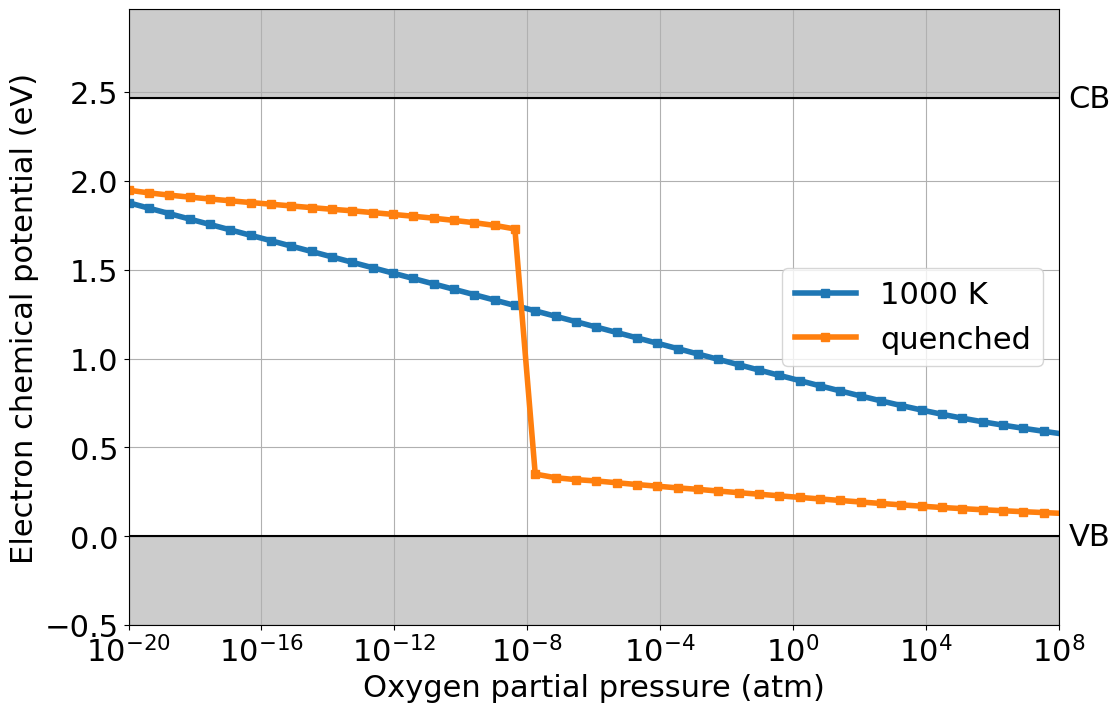

In [31]:
plotter.plot_pO2_vs_fermi_level(thermodata.partial_pressures,
                         fermi_levels={'1000 K':thermodata.fermi_levels,'quenched':thermodata_quenched.fermi_levels},band_gap=da.band_gap);

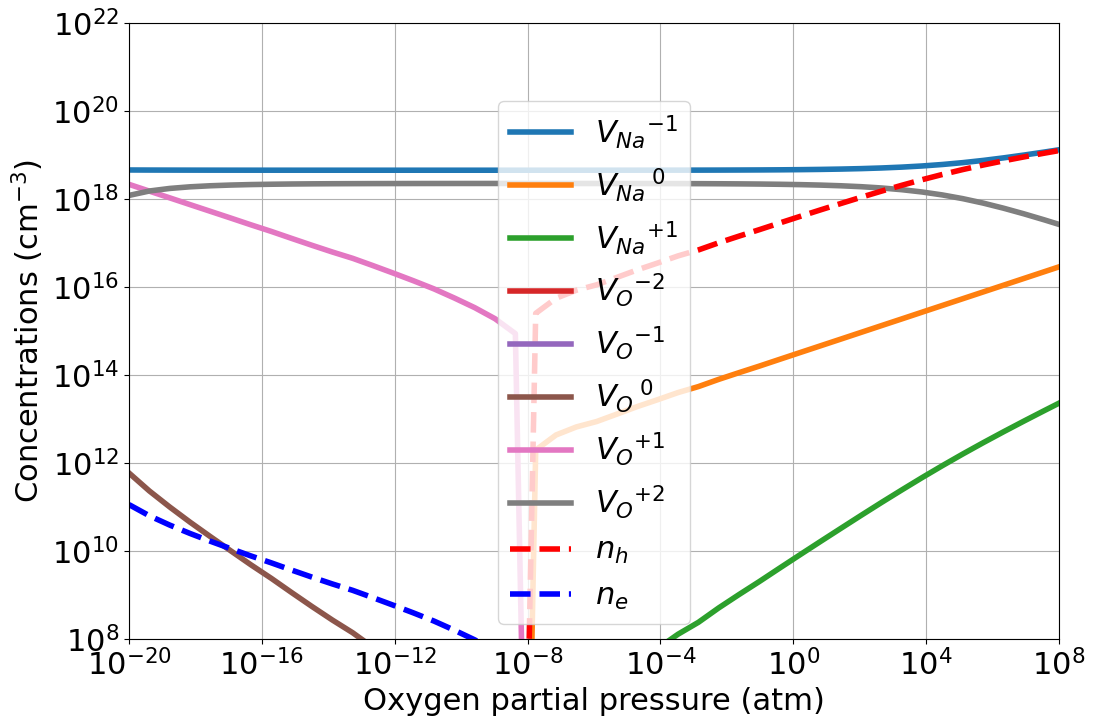

In [32]:
plotter.plot_pO2_vs_concentrations(thermodata_quenched,'all',ylim=(1e08,1e22),exclude=True,names=['Vac_Nb']);

### Quench only a subset of defects

Include the names in the `quenched_species` argument.

In [33]:
thermodata_VO_quenched = pa.get_pO2_quenched_thermodata(pressure_reservoirs,1000,300,quenched_species=['Vac_O'])
thermodata_VNa_quenched = pa.get_pO2_quenched_thermodata(pressure_reservoirs,1000,300,quenched_species=['Vac_Na'])

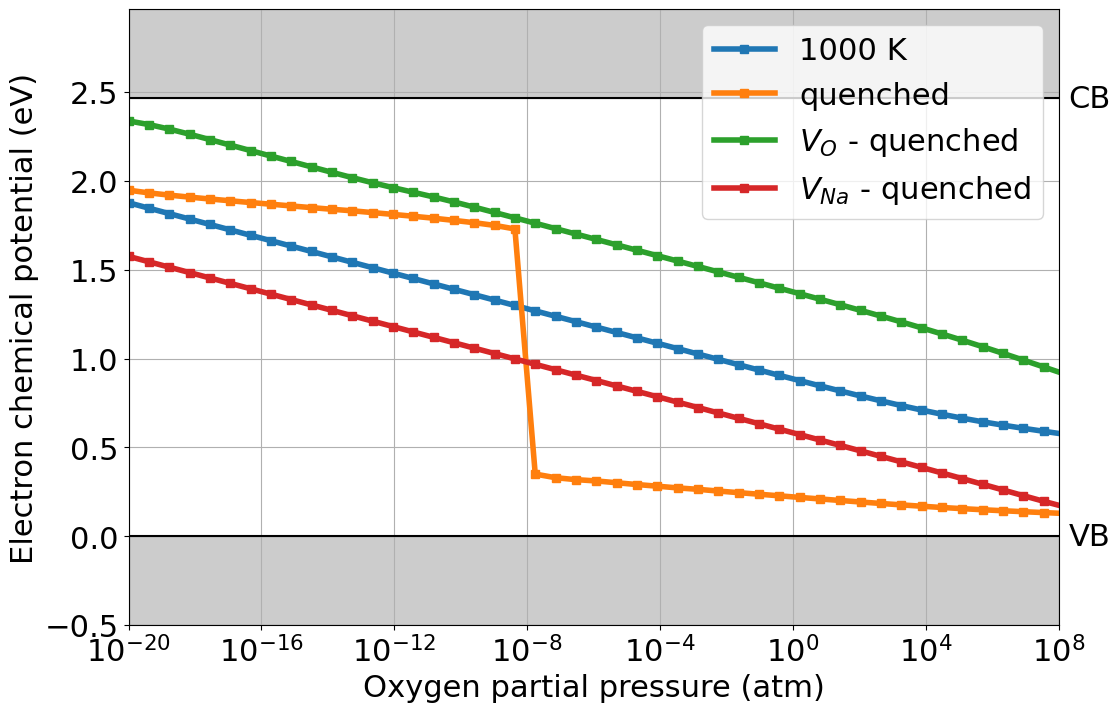

In [34]:
plotter.plot_pO2_vs_fermi_level(thermodata.partial_pressures,
                         fermi_levels={'1000 K':thermodata.fermi_levels,'quenched':thermodata_quenched.fermi_levels,
                                       '$V_O$ - quenched':thermodata_VO_quenched.fermi_levels,'$V_{Na}$ - quenched':thermodata_VNa_quenched.fermi_levels},
                                       band_gap=da.band_gap);

# Extend to extrinsic defects

We apply the same procedure to a dataset containing also extrinsic defects. 

In [35]:
res_ext = Reservoirs.from_json('./data/reservoirs_extrinsic.json')
# filter Ca out
res_ext.filter_reservoirs(inplace=True,elements=['Na','Nb','O','Sr','Sn'])
res_ext.get_dataframe(ndecimals=2)

,Na,Nb,O,Sr,Sn
A,-2.78,-11.10,-8.85,-5.19,-3.99
B,-2.32,-11.22,-8.96,-5.19,-3.99
C,-4.32,-21.26,-4.95,-8.19,-9.99
D,-4.73,-20.85,-4.95,-8.19,-9.99
X,-3.57,-16.25,-6.87,-7.48,-8.18


In [36]:
# exclude defect complexes and Ca
da_ext = da.filter_entries(exclude=True,mode='or',types=['DefectComplex'],elements=['Ca'])
da_ext.get_dataframe()

,symbol,delta atoms,charge,multiplicity
name,,,,
Sub_Sn_on_Nb,$Sn_{Nb}$,"{'Sn': 1, 'Nb': -1}",-2.0,32
Sub_Sn_on_Nb,$Sn_{Nb}$,"{'Sn': 1, 'Nb': -1}",-1.0,32
Sub_Sn_on_Nb,$Sn_{Nb}$,"{'Sn': 1, 'Nb': -1}",0.0,32
Sub_Sr_on_Na,$Sr_{Na}$,"{'Sr': 1, 'Na': -1}",0.0,32
Sub_Sr_on_Na,$Sr_{Na}$,"{'Sr': 1, 'Na': -1}",1.0,32
Sub_Sr_on_Na,$Sr_{Na}$,"{'Sr': 1, 'Na': -1}",2.0,32
Vac_Na,$V_{Na}$,{'Na': -1},-1.0,32
Vac_Na,$V_{Na}$,{'Na': -1},0.0,32
Vac_Na,$V_{Na}$,{'Na': -1},1.0,32


# Fix the concentration of extrinsic defects

The same approach described for quenched defects is also used to fix the concentrations of extrinsic defects. The fixed concentrations are defined in the `DefectThermodynamics` class with the argument `fixed_concentrations`. The argument is a dictionary, with concentrations as values, and works as follows. Both elements or individual defect species can be fixed. This can be differentiated by modifying the keys of the `fixed_concentrations` dictionary. Possibilities are:
- name : The `name` of the defect species is used, and only the defect species with the same name or a defect complex which contains a species with the same name will be affected. For example, if we have an extrinsic species "X", with data for substitutions both on site A ($X_A$) and site B ($X_B$), if we include `{"Sub_X_on_A":y}` in the dictionary, the concentration of $X_A$ will be fixed to the `y` value, but $X_B$ will be unaffected. However, a defect complex including $X_A$ will be affected.
- element : If an element symbol is used in the input dictionary (`{"X":y}`), the concentration of the element across all defect species will be fixed. Therefore, the fixed concentration of "X" will be allowed to equilibrate across sites A, B and on every other defect species containing the element X. Vacancies are considered as a separate element, and are indicated as `"Vac_X"`, where X is the element symbol. 

In [37]:
site_conc = 5e-03
bulk_structure = da.entries[0].bulk_structure
fixed_conc = site_conc * 1/bulk_structure.lattice.volume *1e24 
# in this example we fix the donor dopands higher than acceptors to get a bigger modification of the bulk situation
fixed_concentrations = {'Sr':fixed_conc*10,'Sn':fixed_conc}
fixed_conc

2.530327096933488e+18

### Extrinsic chemical potentials

To obtain the variation of the extrinsic chempots with partial pressure, we define the `extrinsic_chempots_range` dictionary. Since the extrinsic elements are not in the phase diagram, we cannot directly compute the chempot. Instead, we define limit values for oxygen poor and oxygen rich conditions, which will be associated to the chemical potentials in the extrimes of the range provided with the `pressure_range` argument. All values in between are obtained with a linear interpolation. Keep in mind that, when the concentrations of extrinsic elements are fixed, their chemical potential values have no impact on the result, as long as the element is not allowed to equilibrate across defect species.

In [38]:
extrinsic_chempot_range = {'Sr':(res_ext['A']['Sr'],res_ext['D']['Sr']), 
                           'Sn':(res_ext['A']['Sn'],res_ext['D']['Sn'])}
pressure_reservoirs_ext = OxygenPressure().get_pressure_reservoirs_from_pd(res_ext.pd,Composition('NaNbO3'),temperature=1000,
                                                                       extrinsic_chempots_range=extrinsic_chempot_range,npoints=50)
pressure_reservoirs_ext.get_dataframe(ndecimals=2)

,Na,Nb,O,Sr,Sn
1.000000e-20,-2.99,-13.38,-8.01,-5.25,-4.11
4.095000e-20,-3.02,-13.54,-7.95,-5.31,-4.23
1.677000e-19,-3.06,-13.69,-7.89,-5.37,-4.35
6.866000e-19,-3.09,-13.84,-7.83,-5.43,-4.47
2.812000e-18,-3.12,-13.99,-7.77,-5.49,-4.59
1.151000e-17,-3.15,-14.14,-7.71,-5.55,-4.71
4.715000e-17,-3.18,-14.30,-7.65,-5.61,-4.83
1.931000e-16,-3.21,-14.45,-7.59,-5.67,-4.95
7.906000e-16,-3.24,-14.60,-7.53,-5.73,-5.07
3.237000e-15,-3.27,-14.75,-7.47,-5.79,-5.19


In [39]:
pa_ext = DefectThermodynamics(da_ext,dos,fixed_concentrations=fixed_concentrations)
thermodata_ext = pa_ext.get_pO2_thermodata(pressure_reservoirs_ext,temperature=1000)

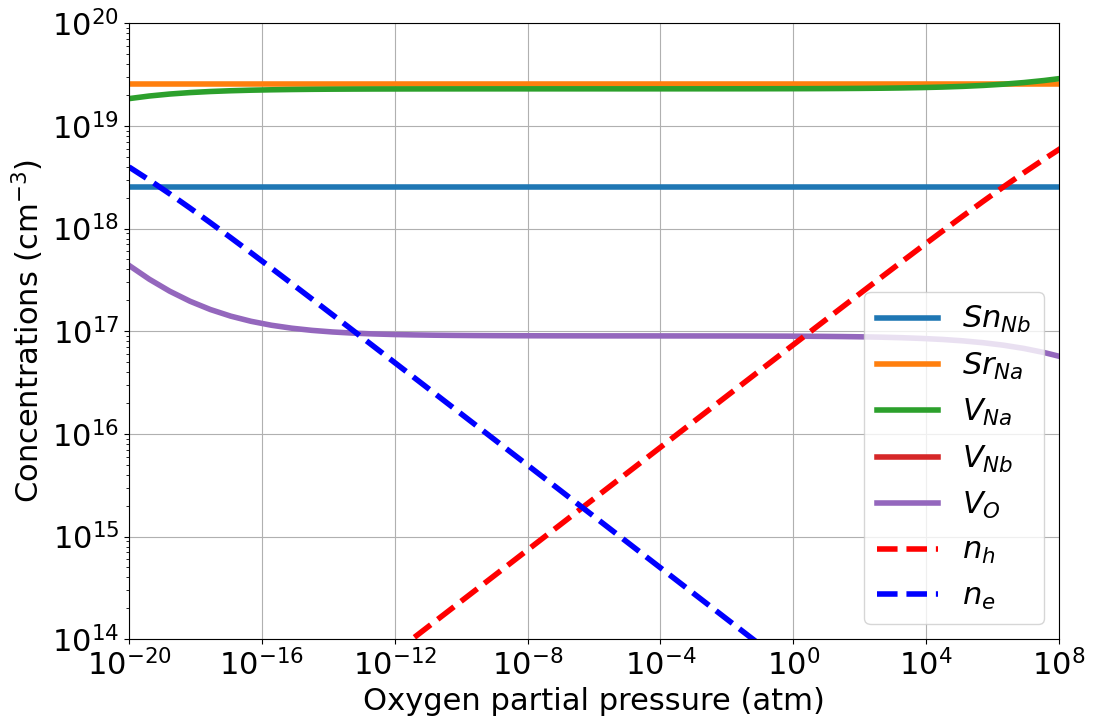

In [40]:
plotter.plot_pO2_vs_concentrations(thermodata_ext,ylim=(1e14,1e20));

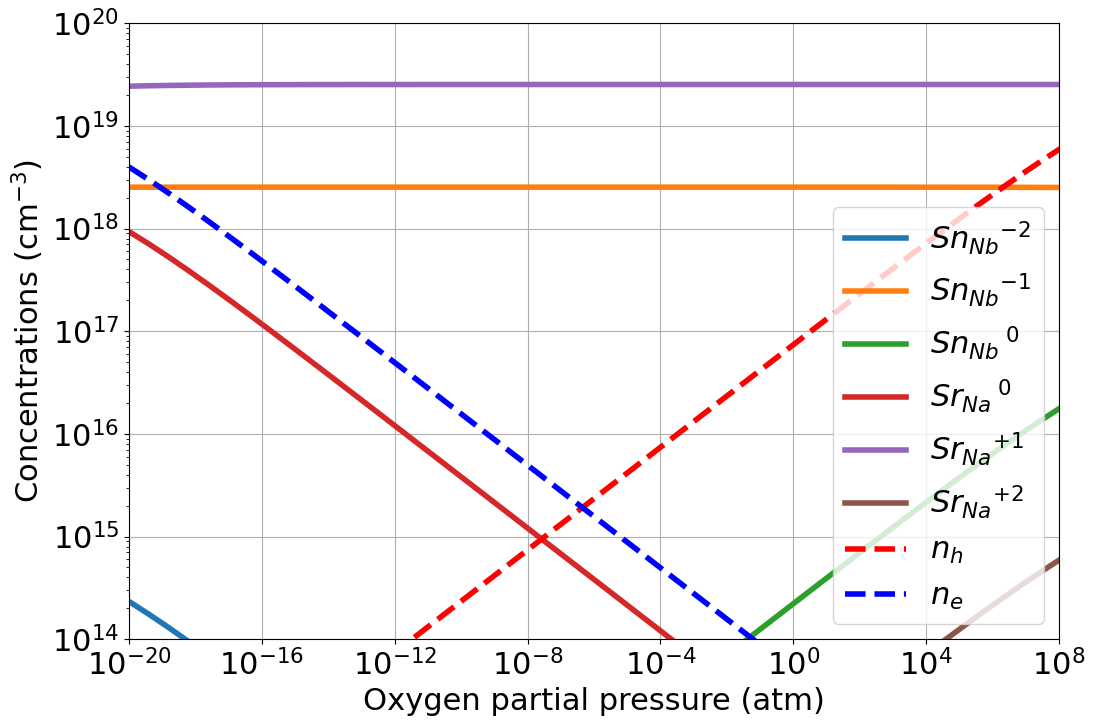

In [41]:
plotter.plot_pO2_vs_concentrations(thermodata_ext,output='all',ylim=(1e14,1e20),names=['Sub_Sr_on_Na','Sub_Sn_on_Nb']);

In [42]:
thermodata_ext_quenched = pa_ext.get_pO2_quenched_thermodata(pressure_reservoirs_ext,initial_temperature=1000,final_temperature=300)

/nfshome/villa/pynter/pynter/defects/pmg/pmg_dos.py:1029: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp((fermi - E) / (_cd("Boltzmann constant in eV/K") * T)))


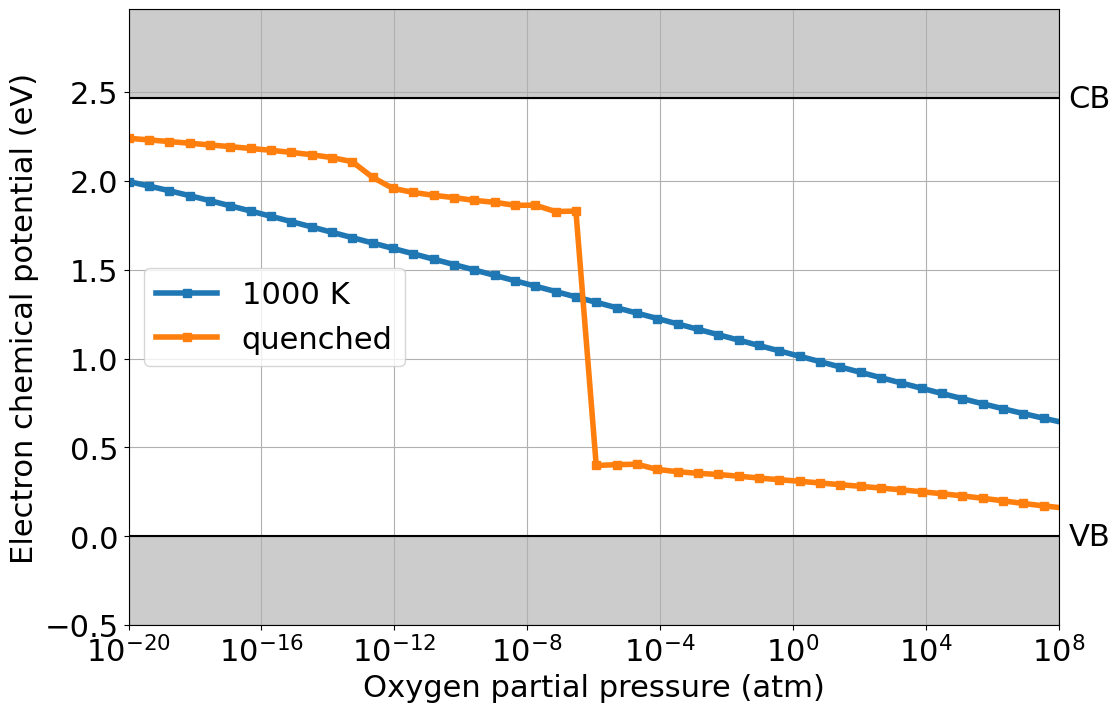

In [43]:
plotter.plot_pO2_vs_fermi_level(thermodata_ext.partial_pressures,
                         fermi_levels={'1000 K':thermodata_ext.fermi_levels,'quenched':thermodata_ext_quenched.fermi_levels},band_gap=da.band_gap);

## Include defect complexes

In [44]:
da_all = da.filter_entries(exclude=True,elements=['Ca'])
da_all.get_dataframe()

,symbol,delta atoms,charge,multiplicity
name,,,,
Sub_Sn_on_Nb,$Sn_{Nb}$,"{'Sn': 1, 'Nb': -1}",-2.0,32
Sub_Sn_on_Nb,$Sn_{Nb}$,"{'Sn': 1, 'Nb': -1}",-1.0,32
Sub_Sn_on_Nb,$Sn_{Nb}$,"{'Sn': 1, 'Nb': -1}",0.0,32
Sub_Sn_on_Nb-Vac_O,$Sn_{Nb}$-$V_{O}$,"{'Sn': 1, 'Nb': -1, 'O': -1}",0.0,192
Sub_Sn_on_Nb-Vac_O,$Sn_{Nb}$-$V_{O}$,"{'Sn': 1, 'Nb': -1, 'O': -1}",1.0,192
Sub_Sn_on_Nb-Vac_O,$Sn_{Nb}$-$V_{O}$,"{'Sn': 1, 'Nb': -1, 'O': -1}",2.0,192
Sub_Sr_on_Na,$Sr_{Na}$,"{'Sr': 1, 'Na': -1}",0.0,32
Sub_Sr_on_Na,$Sr_{Na}$,"{'Sr': 1, 'Na': -1}",1.0,32
Sub_Sr_on_Na,$Sr_{Na}$,"{'Sr': 1, 'Na': -1}",2.0,32


In [45]:
pa_all = DefectThermodynamics(da_all,dos,fixed_concentrations={'Sr':fixed_conc,'Sn':fixed_conc})

In [46]:
thermodata_all = pa_all.get_pO2_thermodata(pressure_reservoirs_ext,1000)

<module 'matplotlib.pyplot' from '/nfshome/villa/miniconda3/envs/recent/lib/python3.11/site-packages/matplotlib/pyplot.py'>

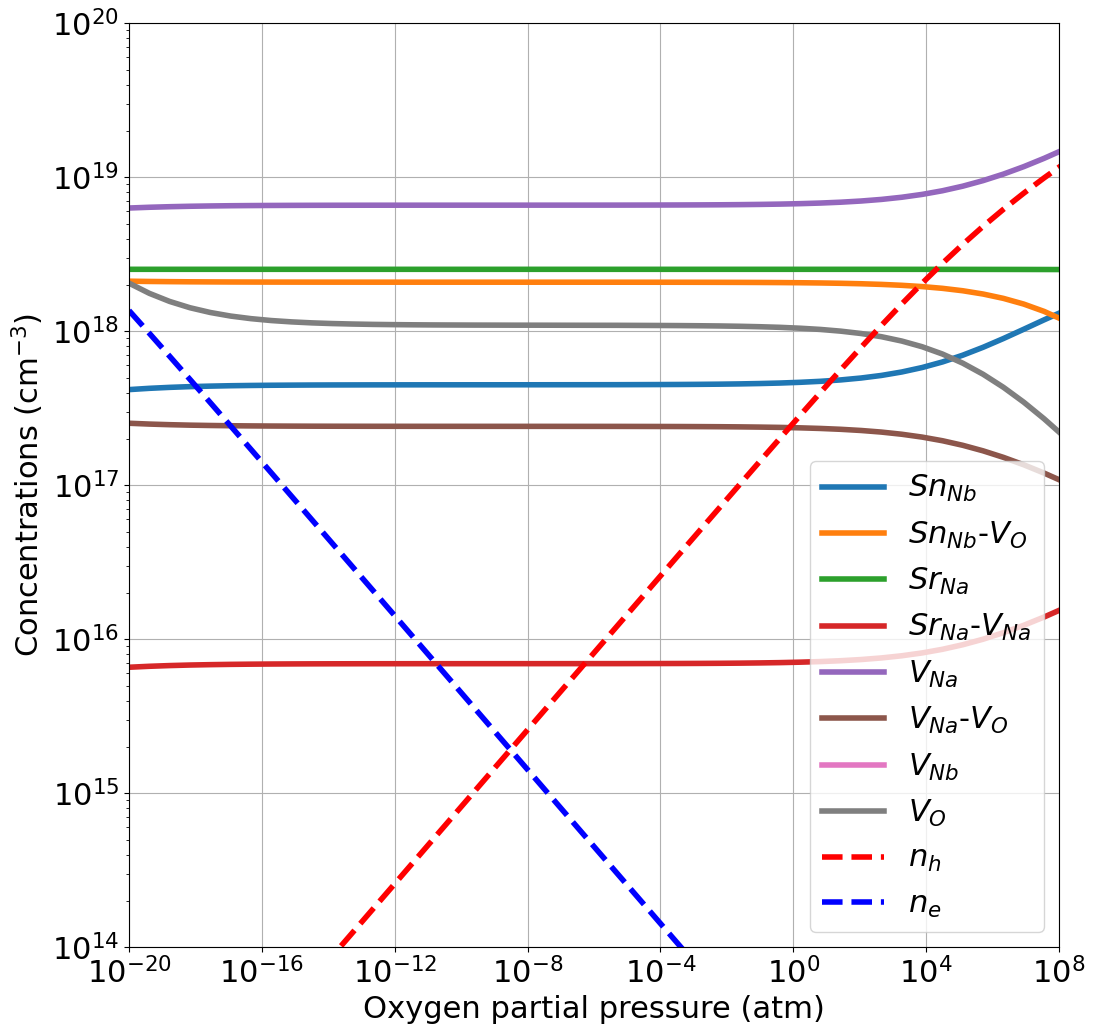

In [47]:
plotter.plot_pO2_vs_concentrations(thermodata_all,ylim=(1e14,1e20),size=(12,12))

In [48]:
thermodata_all_quenched = pa_all.get_pO2_quenched_thermodata(pressure_reservoirs_ext,initial_temperature=1000,final_temperature=300)

/nfshome/villa/pynter/pynter/defects/pmg/pmg_dos.py:1029: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp((fermi - E) / (_cd("Boltzmann constant in eV/K") * T)))


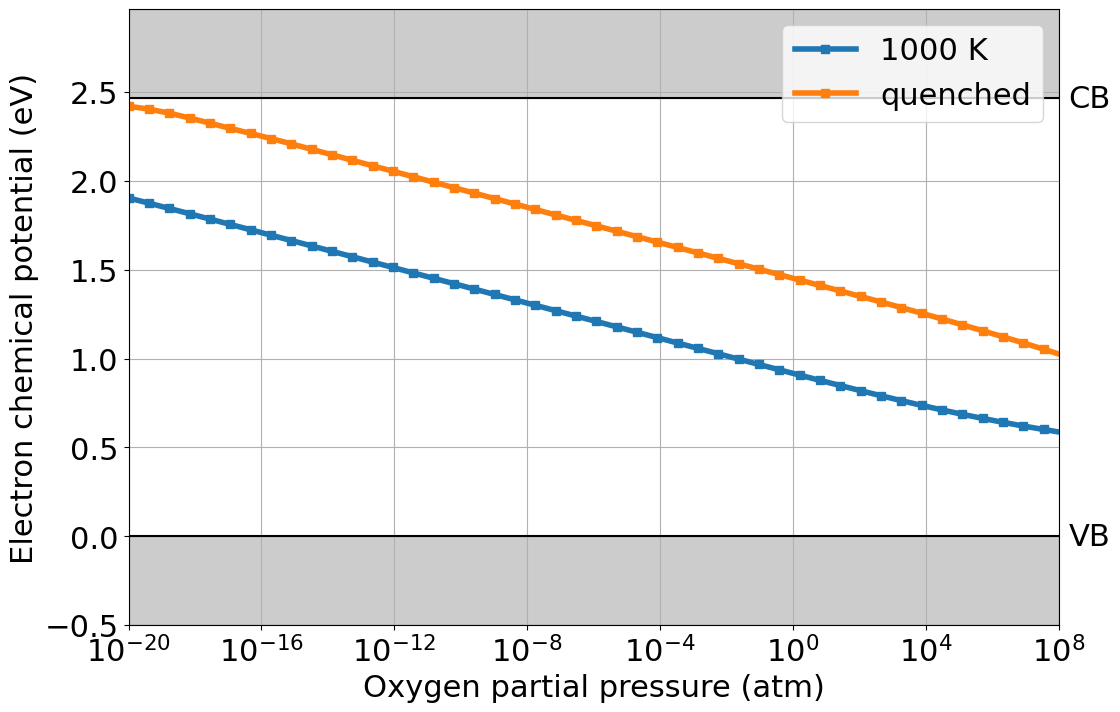

In [49]:
plotter.plot_pO2_vs_fermi_level(thermodata_all.partial_pressures,
                         fermi_levels={'1000 K':thermodata_all.fermi_levels,'quenched':thermodata_all_quenched.fermi_levels},band_gap=da.band_gap);